<a href="https://colab.research.google.com/github/kaushikabhishek87/Tensorflow_projects/blob/main/07_Food_101_tensorflow_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
! nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-2ec74a63-f79d-b3ef-8632-5c57ec9e7641)


In [66]:
# Due to bug in tf 2.5 regarding mixed precision training
!pip install tensorflow==2.4.1

     |████████████████████████████████| 394.3MB 43kB/s 
     |████████████████████████████████| 2.9MB 47.5MB/s 
     |████████████████████████████████| 3.8MB 40.9MB/s 
     |████████████████████████████████| 471kB 49.2MB/s 
  Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Found existing installation: grpcio 1.34.1
    Uninstalling grpcio-1.34.1:
      Successfully uninstalled grpcio-1.34.1
  Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Found existing installation: tensorflow 2.5.0
    Uninstalling tensorflow-2.5.0:
      Successfully uninstalled tensorflow-2.5.0


In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import plot_loss_curves, compare_historys

--2021-06-27 08:11:53--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.2’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-06-27 08:11:53 (93.9 MB/s) - ‘helper_functions.py.2’ saved [10246/10246]



In [3]:
(train, test), ds_info  = tfds.load(name="food101",
                                  split=["train", 'validation'],
                                  shuffle_files=True,
                                  as_supervised=True,
                                  with_info=True)

In [4]:
# Get the class names
class_names = ds_info.features["label"].names
class_names[0:10], len(class_names)

(['apple_pie',
  'baby_back_ribs',
  'baklava',
  'beef_carpaccio',
  'beef_tartare',
  'beet_salad',
  'beignets',
  'bibimbap',
  'bread_pudding',
  'breakfast_burrito'],
 101)

In [5]:
train_one_sample = train.take(2)
train_one_sample

<TakeDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [6]:
# Output info about training set 
for image, label in train_one_sample:
  print(image.shape,"\n" , image.dtype,"\n",  label,"\n",  class_names[label] )

(382, 512, 3) 
 <dtype: 'uint8'> 
 tf.Tensor(52, shape=(), dtype=int64) 
 gyoza
(512, 512, 3) 
 <dtype: 'uint8'> 
 tf.Tensor(72, shape=(), dtype=int64) 
 pancakes


In [7]:
import tensorflow as tf
image, tf.reduce_max(image), tf.reduce_min(image)

(<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
 array([[[ 42,  40,  51],
         [ 41,  39,  50],
         [ 40,  38,  49],
         ...,
         [ 50,  23,   6],
         [ 51,  24,   7],
         [ 51,  24,   7]],
 
        [[ 41,  39,  50],
         [ 41,  39,  50],
         [ 41,  39,  50],
         ...,
         [ 47,  20,   3],
         [ 48,  21,   4],
         [ 49,  22,   5]],
 
        [[ 40,  38,  49],
         [ 41,  39,  50],
         [ 42,  40,  51],
         ...,
         [ 47,  20,   3],
         [ 48,  21,   4],
         [ 48,  21,   4]],
 
        ...,
 
        [[188, 180, 191],
         [188, 180, 191],
         [189, 181, 192],
         ...,
         [179, 178, 186],
         [177, 176, 184],
         [175, 174, 182]],
 
        [[185, 177, 188],
         [186, 178, 189],
         [187, 179, 190],
         ...,
         [178, 177, 185],
         [176, 175, 183],
         [175, 174, 182]],
 
        [[179, 171, 182],
         [181, 173, 184],
         [183,

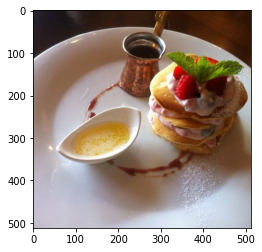

In [8]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [9]:
# Pre Proceesing Fucntion

def preprocess_image(image, label, img_shape=224):
  image = tf.image.resize(image, [img_shape,img_shape])
  # image = image/255 # Scale image , Not required with EfficientBX.. as it already have a Nomralisation layer
  return tf.cast(image, tf.float32), label # Return a tuple of image & label

In [10]:
preprocess_image(image=image, label=label)

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[ 41.127552 ,  39.127552 ,  50.127552 ],
         [ 40.642857 ,  38.642857 ,  49.642857 ],
         [ 40.285713 ,  38.285713 ,  49.285713 ],
         ...,
         [ 48.92855  ,  21.928549 ,   4.500022 ],
         [ 47.7398   ,  20.7398   ,   3.7398005],
         [ 49.301044 ,  22.301043 ,   5.3010426]],
 
        [[ 40.642857 ,  38.642857 ,  49.642857 ],
         [ 42.9949   ,  40.9949   ,  51.9949   ],
         [ 41.85714  ,  39.85714  ,  50.85714  ],
         ...,
         [ 49.127533 ,  22.127531 ,   4.699003 ],
         [ 47.862247 ,  20.862246 ,   3.8622465],
         [ 48.928574 ,  21.928572 ,   4.9285717]],
 
        [[ 42.07653  ,  39.862244 ,  50.862244 ],
         [ 41.071426 ,  38.85714  ,  49.85714  ],
         [ 38.663265 ,  36.44898  ,  47.44898  ],
         ...,
         [ 48.785713 ,  21.785713 ,   4.785714 ],
         [ 47.98469  ,  20.770405 ,   4.413263 ],
         [ 47.785713 ,  20.571428 ,   4.214286

In [11]:
## Referring to best practices from tensorflow docuemntation - data performamce

## Batch & Prepare datasets usinga, Data Input PIPE LINE
#### Map Preprocesing function to train data (and parrlalise it)
train_data = train.map(map_func=preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle Train data & turn into batches for loading faster
train_data = train_data.shuffle(buffer_size=10000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE) # 10000 Sample at a time , depends upon memory

# Map Preprocessing test data
test_data = test.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE).batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [12]:
train_data,test_data

(<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>)

In [13]:
## Modelling callbacks

# Model Checkpoint
checkpoint_path = "model_checkpoints/cp.ckpt"

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, monitor ="val_loss",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      verbose=0)

In [14]:
## Setup Mixed Precision Training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla T4, compute capability 7.5


In [15]:
!nvidia-smi

Sun Jun 27 08:11:59 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   75C    P0    32W /  70W |    254MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [16]:
mixed_precision.global_policy()

<Policy "mixed_float16">

In [21]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental  import preprocessing

input_shape = (224,224,3)

base_model = tf.keras.applications.EfficientNetB0(include_top = False )

base_model.trainable = False

# Create Model
inputs = layers.Input(shape=input_shape, name="input_layer")

## IF you are uing other than Efficient using preprocessing layer to normalise data
# X = preprocessing.Rescaling(1./255)(X)

X = base_model(inputs, training=False)
X = layers.GlobalAveragePooling2D()(X)
X = layers.Dense(len(class_names))(X)
outputs = layers.Activation("softmax", dtype=tf.float32, name = "softmax_float32")(X) ## Doing it for mixed precision training
model = tf.keras.Model(inputs, outputs)


# Compile

model.compile(loss="sparse_categorical_crossentropy",
             optimizer="Adam",
             metrics=["accuracy"])

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 101)               129381    
_________________________________________________________________
softmax_float32 (Activation) (None, 101)               0         
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
_________________________________________________________________


In [23]:
# check the dtype_policy - are we using mixed precision ?

for layer in model.layers:
  print(layer.name, layer.trainable, layer.dtype_policy)



input_layer True <Policy "float32">
efficientnetb0 False <Policy "mixed_float16">
global_average_pooling2d True <Policy "mixed_float16">
dense True <Policy "mixed_float16">
softmax_float32 True <Policy "float32">


In [27]:
for layer in model.layers[1].layers[:20]:
  print(layer.name, layer.trainable, layer.dtype_policy)


input_4 False <Policy "float32">
rescaling_3 False <Policy "mixed_float16">
normalization_3 False <Policy "float32">
stem_conv_pad False <Policy "mixed_float16">
stem_conv False <Policy "mixed_float16">
stem_bn False <Policy "mixed_float16">
stem_activation False <Policy "mixed_float16">
block1a_dwconv False <Policy "mixed_float16">
block1a_bn False <Policy "mixed_float16">
block1a_activation False <Policy "mixed_float16">
block1a_se_squeeze False <Policy "mixed_float16">
block1a_se_reshape False <Policy "mixed_float16">
block1a_se_reduce False <Policy "mixed_float16">
block1a_se_expand False <Policy "mixed_float16">
block1a_se_excite False <Policy "mixed_float16">
block1a_project_conv False <Policy "mixed_float16">
block1a_project_bn False <Policy "mixed_float16">
block2a_expand_conv False <Policy "mixed_float16">
block2a_expand_bn False <Policy "mixed_float16">
block2a_expand_activation False <Policy "mixed_float16">


In [ ]:
history_model = model.fit(train_data, 
                          epochs=5,
                          steps_per_epoch = len(train_data),
                          validation_data = test_data,
                          validation_steps = int(0.25 * len(test_data)),
                          callbacks=[model_checkpoint])